# Data exploration untuk harga rumah (sales price) from Kaggle

Proses import paket serta library yang diperlukan untuk melakukan analisis data harga rumah

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Kemudian, import juga drive agar data bisa diambil dari google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import os dengan tujuan untuk memindahkan direktori dengan perintah method chdir()

In [ ]:
import os
os.chdir('./drive/My Drive/Colab Notebooks/nlp/UAS/')

Mengambil data train.csv dan menyimpannya pada variabel dengan nama df_train

In [ ]:
df_train = pd.read_csv('train.csv')

Melihat seluruh atribut yang ada pada variabel df_train dengan method columns

In [ ]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Menghitung nilai skewness dan kurtosis pada atribut SalePrice

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Melihat deskripsi dari atribut SalePrice

In [ ]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Melihat distribusi pada atribut SalePrice dengan histogram.

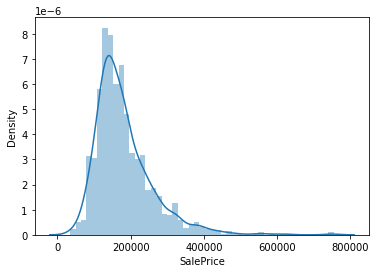

In [ ]:
sns.distplot(df_train['SalePrice']);

Melihat scatter plot untuk SalesPrice dan PoolArea

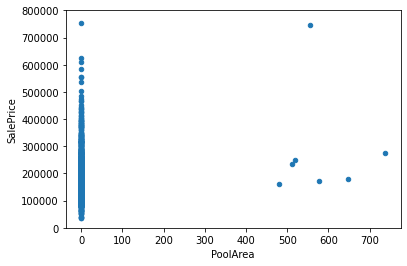

In [ ]:
data = pd.concat([df_train['SalePrice'], df_train['PoolArea']], axis=1)
data.plot.scatter(x='PoolArea', y='SalePrice', ylim=(0,800000));

Berdasarkan data diatas diperoleh bahwa harga rumah yang tersedia semakin tinggi, namun fasilitas yang tersedia lebih banyak yang tidak menyediakan kolam renang.

Melihat Box-Plot untuk SalesPrice dan GarageQual.

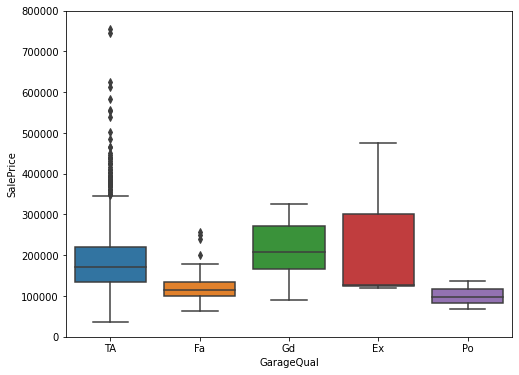

In [ ]:
data = pd.concat([df_train['SalePrice'], df_train['GarageQual']], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x="GarageQual", y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

Membuat heatmap correlation untuk melihat korelasi dari setiap variabel (atau atribut) satu sama lain.

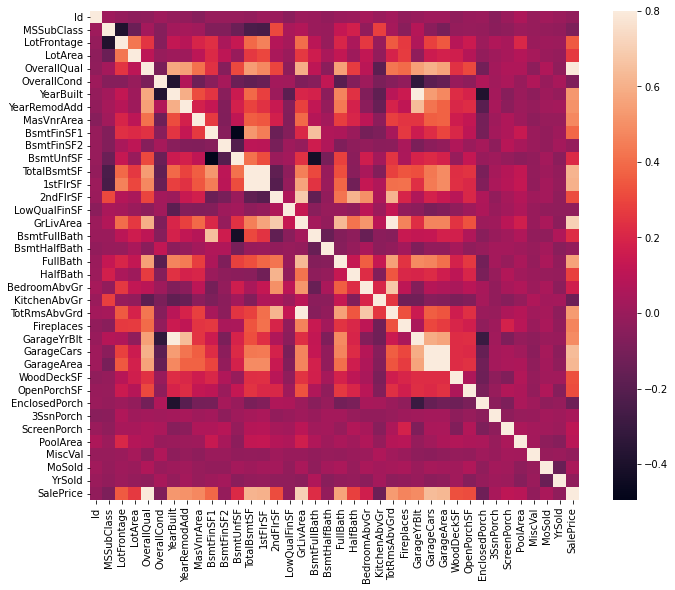

In [ ]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Menentukan 5 korelasi teratas, dimana variabel apa saja yang mempengaruhi terhadap SalePrice

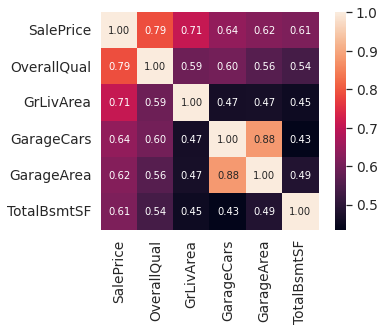

In [ ]:
#saleprice correlation matrix
k = 6 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Dari data heatmap tersebut dapat disimpulkan bahwa 5 variabel atau fitur yang mempengaruhi SalePrice tersebut terdiri atas OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF.

Selanjutnya, dari variabel yang mempengaruhi dari SalePrice tersebut, dilihat masing-masing distribusi plot nya secara detail.

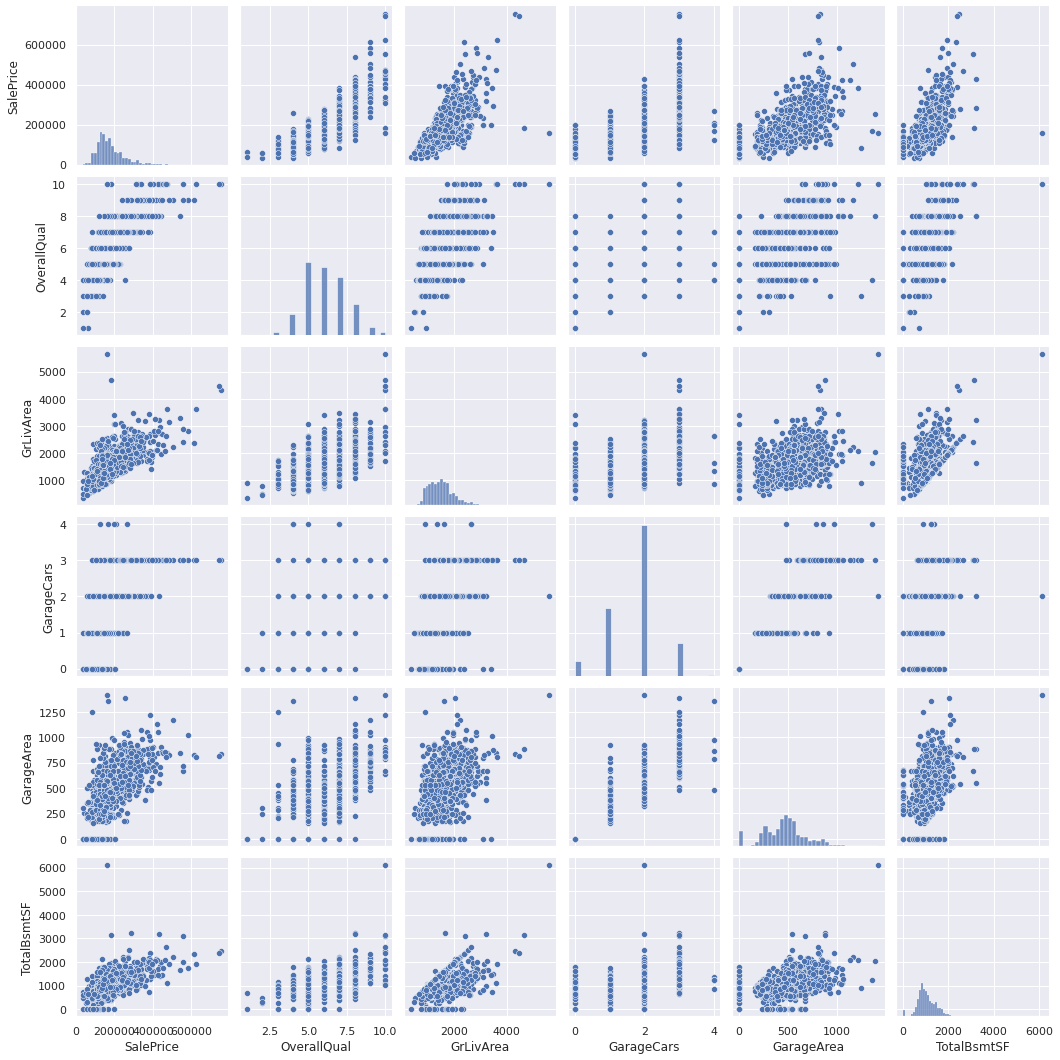

In [ ]:
sns.set()
cols = ['SalePrice', 'OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

# Cleaning Data
Pada heatmap sebelumnya, sudah dapat ditentukan 5 varibel/atribut yang mempengaruhi dari SalePrice, namun perlu dilihat terlebih dahulu kesesuaikan dari data tersebut, sehingga diperlukan proses cleaning data.

Melihat data yang Missing dengan melihat seluruh variabel yang memiliki data kosong dan menampilkannya menjadi 20 teratas beserta persentase nya.

In [ ]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


Dari data diatas diperoleh bahwa ada beberapa variabel yang masih terdapat missing data. Namun, karena pada heatmap sebelumnya dilihat bahwa 5 variabel atau atribut yang mempengaruhi adalah OverallQual, GrLivArea, GarageCars, GarageArea. Sehingga, perlu dilihat apakah variabel tersebut terdapat data yang missing atau tidak.

In [ ]:
total = df_train[['SalePrice','OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']].isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
SalePrice,0.0,0.0
OverallQual,0.0,0.0
GrLivArea,0.0,0.0
GarageCars,0.0,0.0
GarageArea,0.0,0.0
TotalBsmtSF,0.0,0.0


## Melihat distribusi normal dari masing-masing variabel/atribut

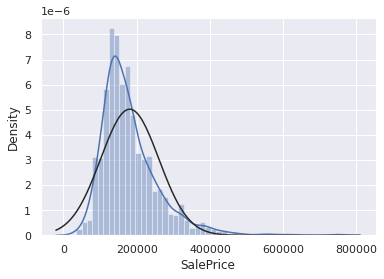

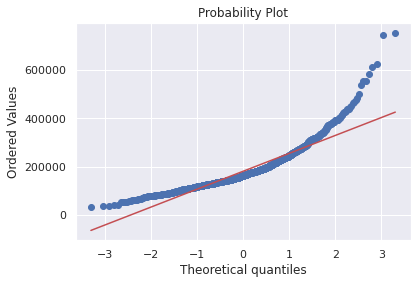

In [ ]:
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Dapat dilihat bahwa distribusi Probability plot tidak linier (nilai skewness positif tetapi tidak mengikuti garis diagonal). Maka, diperlukan transformasi data untuk mengatasi permasalahan tersebut. Pada kasus skawness yang positif, maka menggunakan log transformation sangat baik.

In [ ]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

Melihat kembali histogram serta probability plot setelah dilakukan log transformation.

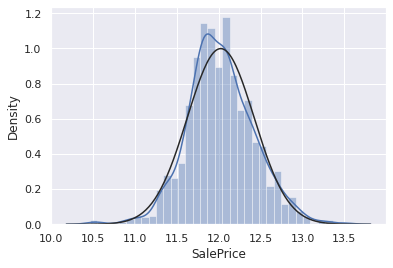

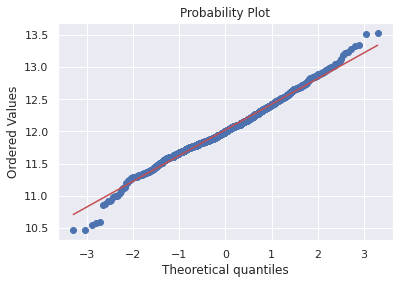

In [ ]:
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Melihat kembali histogram serta probability plot pada OverallQual.

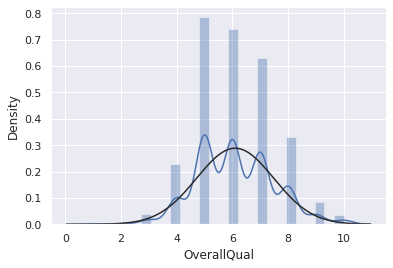

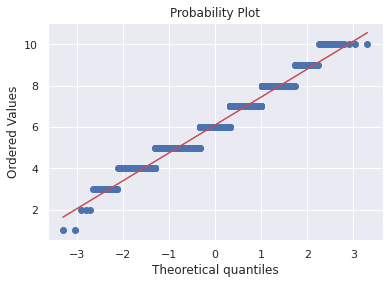

In [ ]:
sns.distplot(df_train['OverallQual'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['OverallQual'], plot=plt)

Melihat kembali histogram serta probability plot pada GrLiVArea.

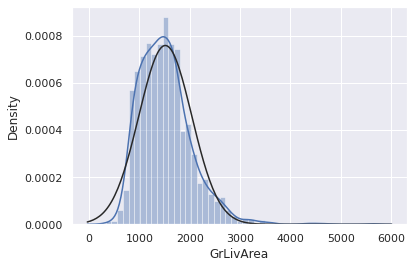

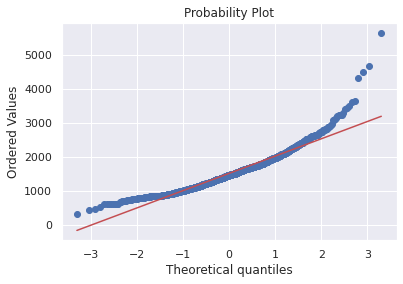

In [ ]:
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

Karena pada probability plot menunjukkan distribusi tidak linier, maka diperlukan log transformation.

In [ ]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

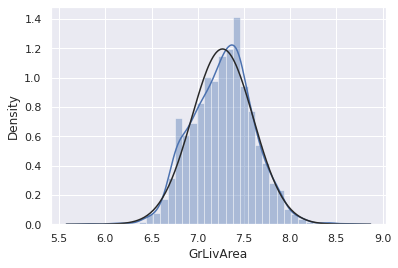

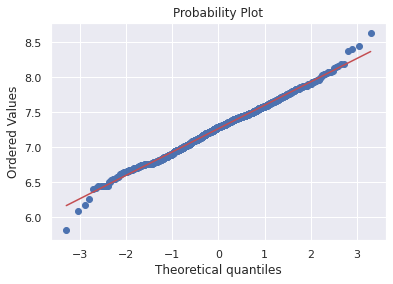

In [ ]:
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

Melihat kembali histogram serta probability plot pada GarageCars.

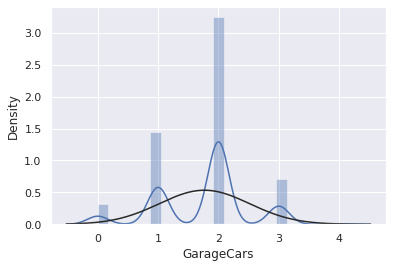

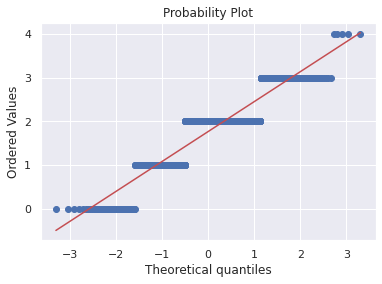

In [ ]:
sns.distplot(df_train['GarageCars'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GarageCars'], plot=plt)

Melihat kembali histogram serta probability plot pada TotalBsmSF.

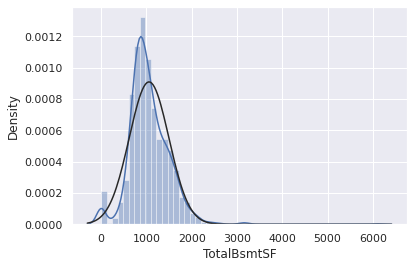

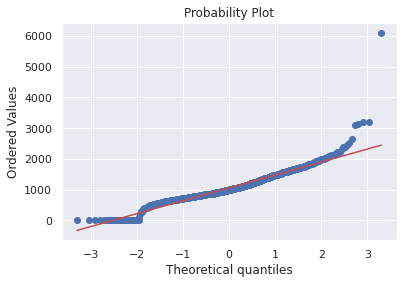

In [ ]:
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [ ]:
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [ ]:
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

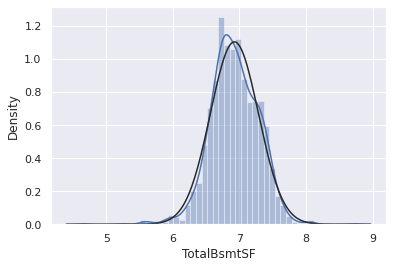

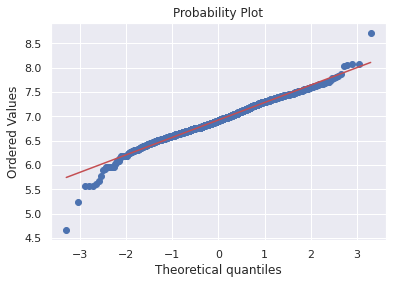

In [ ]:
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

Karena data sudah dibersihkan, selanjutnya melihat distribusi dari 5 variabel yang mempengaruhi SalePrice dengan heatmap

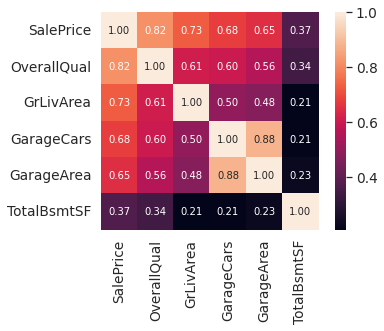

In [ ]:
k = 6 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Selanjutnya melihat distribusi dari 5 variabel yang mempengaruhi SalePrice

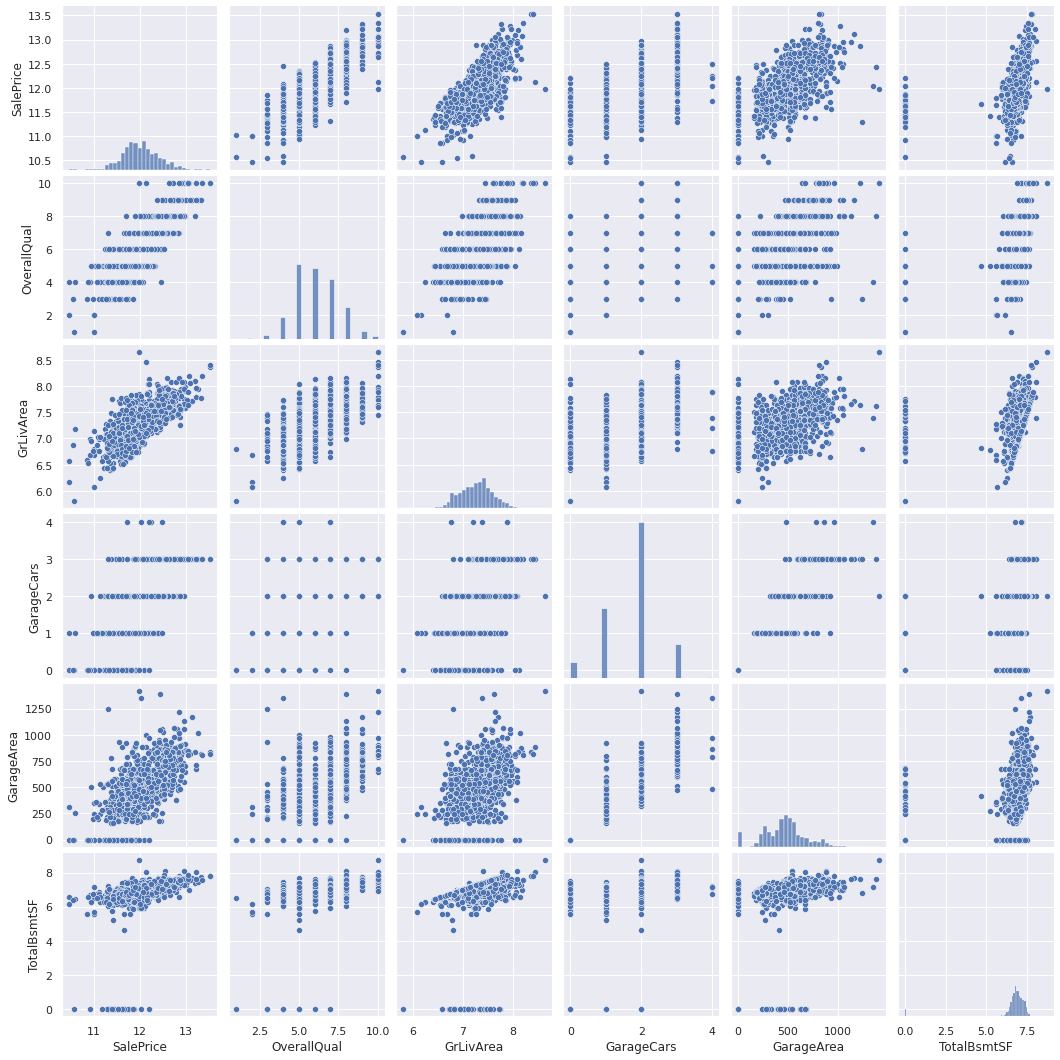

In [ ]:
sns.set()
cols = ['SalePrice', 'OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();